In [2]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("titanic_data.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Survived', ylabel='count'>

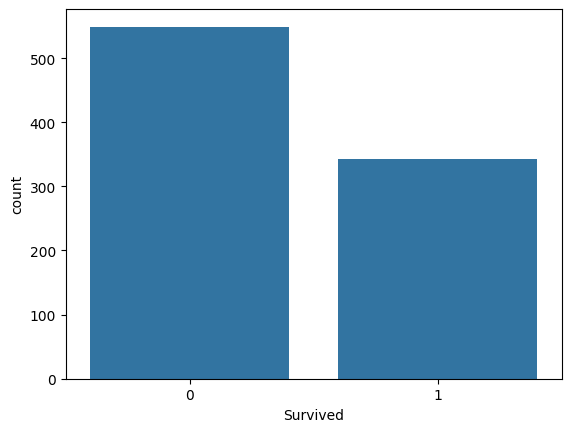

In [4]:
sb.countplot(x="Survived",data=data)

<Axes: xlabel='Survived', ylabel='count'>

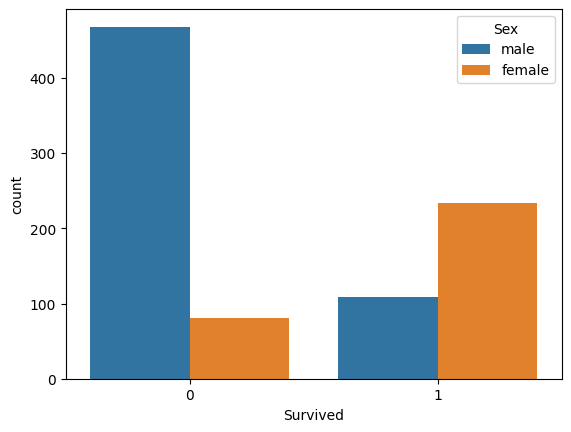

In [5]:
sb.countplot(x="Survived",hue="Sex",data=data)

<Axes: xlabel='Survived', ylabel='count'>

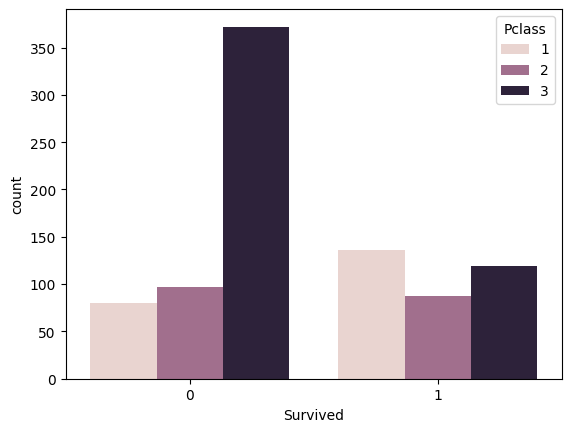

In [6]:
sb.countplot(x="Survived",hue="Pclass",data=data)

<Axes: xlabel='Survived', ylabel='count'>

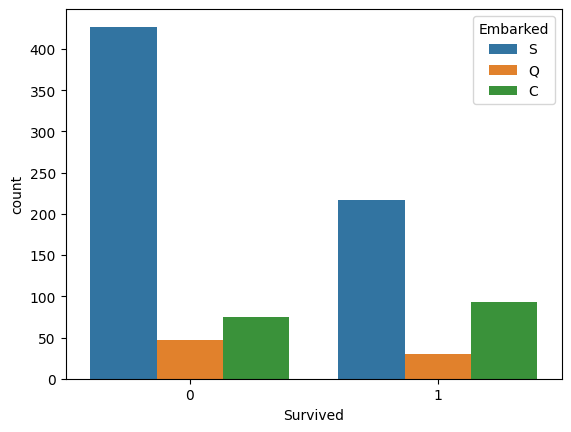

In [7]:
sb.countplot(x="Survived",hue="Embarked",data=data)

In [8]:
data.drop(["PassengerId","Name","SibSp","Parch","Ticket","Cabin","Fare"],axis=1,inplace=True)


In [9]:
data.head(2)

,Survived,Pclass,Sex,Age,Embarked
0,0,3,male,22.0,S
1,1,1,female,38.0,C


In [10]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Embarked      2
dtype: int64

In [11]:
data["Age"].fillna(data["Age"].mean(),inplace=True)

In [12]:
data["Embarked"].mode()

0    S
Name: Embarked, dtype: object

In [13]:
data["Embarked"].fillna("S",inplace=True)

In [16]:
sex=pd.get_dummies(data["Sex"],drop_first=True)
sex

,male
0,True
1,False
2,False
3,False
4,True
...,...
886,True
887,False
888,False
889,True


In [17]:
embarked=pd.get_dummies(data["Embarked"],drop_first=True)
embarked

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True
...,...,...
886,False,True
887,False,True
888,False,True
889,False,False


In [18]:
data=pd.concat([data,sex,embarked],axis=1)
data.head(2)

,Survived,Pclass,Sex,Age,Embarked,male,Q,S
0,0,3,male,22.0,S,True,False,True
1,1,1,female,38.0,C,False,False,False


In [19]:
data.drop(["Sex","Embarked"],axis=1,inplace=True)

In [20]:
pclass=pd.get_dummies(data["Pclass"],drop_first=True)
data=pd.concat([data,pclass],axis=1)
data.drop("Pclass",axis=1,inplace=True)


In [21]:
data.head(2)

,Survived,Age,male,Q,S,2,3
0,0,22.0,True,False,True,False,True
1,1,38.0,False,False,False,False,False


In [22]:
X=data.iloc[:,1:7].values

In [23]:
Y=data.iloc[:,0:1].values


In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0,test_size=0.2)

In [25]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,Y_train.ravel())

LogisticRegression()

In [26]:
y_pred=lr.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,Y_test)


0.7988826815642458

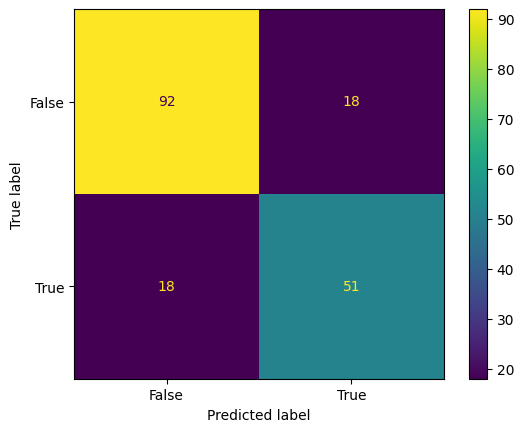

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
confusion=confusion_matrix(Y_test,y_pred)
matrix=ConfusionMatrixDisplay(confusion,display_labels=[False,True])
matrix.plot()
plt.show()